训练集， 正实例点是$x_1 = (3, 3)^T, x_2 = (4, 3)^T$, 负实例点是$x_3 = (1, 1)^T$, 用感知机学习算法的原始形式求感知机模型$f(x) = sign(wx + b)$. 这里， $w = (w^{(1)}, w^{(2)})^T, x =(x^{(1)}, x^{(2)})^T$

In [237]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipdb

统计学习方法`P29`原始形式`

In [98]:
#初始化训练集以及学习率
training_set = np.array([[3,3,1], [4,3,1], [1,1,1]])
training_y = [1, 1, -1]
n = 1

In [99]:
#定义感知机模型
def sign(w, x):
    return np.array(w).dot(x.T)

`步骤一`初始化w0, b0, 这里我们采用向量的形式， $\hat{w} = (w0, b0)$

In [100]:
w0 = (0, 0, 0)

In [101]:
#步骤四：重复直至updata为True
updata = False
i = 0
while updata == False:
    #首先将updata置为True， 如果步骤二执行期间没有发现要更新w0，则步骤四执行结束
    updata = True
    #步骤二:在训练集中选取数据（xi，yi）
    for index, point in enumerate(training_set):
        if (training_y[index] * sign(w0, point)) <= 0:
            #步骤三：更新w0 
            w0 += n * training_y[index] * point
            updata = False
            i = i + 1
            print("Iteration %s" % i, ": 误分类点: x(%s)" % (index + 1), " w = ", w0)

Iteration 1 : 误分类点: x(1)  w =  [3 3 1]
Iteration 2 : 误分类点: x(3)  w =  [2 2 0]
Iteration 3 : 误分类点: x(3)  w =  [ 1  1 -1]
Iteration 4 : 误分类点: x(3)  w =  [ 0  0 -2]
Iteration 5 : 误分类点: x(1)  w =  [ 3  3 -1]
Iteration 6 : 误分类点: x(3)  w =  [ 2  2 -2]
Iteration 7 : 误分类点: x(3)  w =  [ 1  1 -3]


***作图来验证最后分类效果***

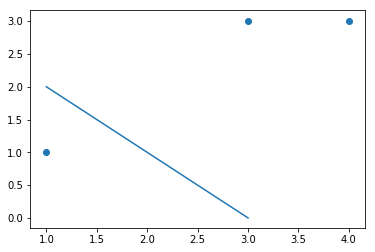

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(training_set[:,0], training_set[:,1])
x = np.linspace(1, 3)
# 根据w(1)*x(1) + w(2)*x(2) + b= 0, 我们求得y=x(2)=...
y = (w0[2]+x*w0[0])/(-w0[1])
ax.plot(x, y)

由于数据比较简单， 可以看出分类的效果很好。下面我们不妨将其编成一整个函数模块，再用一个复杂点的例子来验证一下。

In [115]:
def perception_training(training_set, training_y):
    def sign(w, x):
        return np.array(w).dot(x.T)

    updata = False
    i = 0
    w0 = (0, 0, 0)
    while updata == False:
        updata = True
        for index, point in enumerate(training_set):
            if (training_y[index] * sign(w0, point)) <= 0:
                w0 += n * training_y[index] * point
                updata = False
                i = i + 1
                print("Iteration %s" % i, ": 误分类点: x(%s)" % (index + 1), " w = ", w0)
    print("Final :", "w(0)=", w0[0], ",w(1)=", w0[1], ",b=", w0[2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    training_set_true = training_set[np.array(training_y) == 1]
    training_set_false = training_set[np.array(training_y) == -1]
    ax.scatter(training_set_true[:,0], training_set_true[:,1], c="red")
    ax.scatter(training_set_false[:,0], training_set_false[:,1], c="blue")
    x = np.linspace((training_set[:, 0]).min(), (training_set[:, 0]).max())
    y = (w0[2]+x*w0[0])/(-w0[1])
    ax.plot(x, y)

Iteration 1 : 误分类点: x(1)  w =  [1 3 1]
Iteration 2 : 误分类点: x(5)  w =  [-1  2  0]
Iteration 3 : 误分类点: x(5)  w =  [-3  1 -1]
Iteration 4 : 误分类点: x(1)  w =  [-2  4  0]
Iteration 5 : 误分类点: x(5)  w =  [-4  3 -1]
Iteration 6 : 误分类点: x(2)  w =  [-2  5  0]
Iteration 7 : 误分类点: x(5)  w =  [-4  4 -1]
Iteration 8 : 误分类点: x(2)  w =  [-2  6  0]
Iteration 9 : 误分类点: x(5)  w =  [-4  5 -1]
Final : w(0)= -4 ,w(1)= 5 ,b= -1


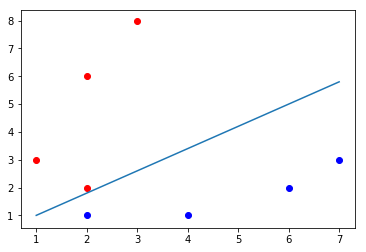

In [116]:
training_set = np.array([[1, 3, 1], [2, 2, 1], [3, 8, 1], [2, 6, 1], [2, 1, 1], [4, 1, 1], [6, 2, 1], [7, 3, 1]])
training_y = [1, 1, 1, 1, -1, -1, -1, -1]
perception_training(training_set, training_y)

下面考虑其对偶形式`P33`, 沿用上一个例子

In [279]:
def perception_training_duailty(training_set, training_y):
    def test(a, b, index, training):
        #ipdb.set_trace()
        result = ((a * training[:,[2]] * training[:,[0, 1]]).dot(training[index, [0, 1]])).sum() + b
        return result 

    updata = False
    i = 0
    training = np.hstack((training_set[:,[0, 1]],(np.array(training_y)).reshape(len(training_y), 1)))
    #步骤一：初始化a，b
    a = np.zeros([len(training), 1])
    b = 0
    #步骤四：执行步骤二直至没有更新
    while updata == False:
        updata = True
        #步骤二：选取数据
        for index, point in enumerate(training):
            #步骤三： 更新数据
            if (training_y[index] * test(a, b, index, training)) <= 0:
                updata = False
                a[index] += eta
                b = b + eta * training_y[index]
                i = i + 1
                print("iteration %s" % i, "a = {0} {1} {2}".format(a[0][0], a[1][0], a[2][0]), "b = ", b)
                
    w0 = (a * training[:, [2]] * training[:, [0, 1]]).sum(axis=0)          
    print("Final :", "w(0)=", w0[0], ",w(1)=", w0[1], ",b=", b)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    training_set_true = training_set[np.array(training_y) == 1]
    training_set_false = training_set[np.array(training_y) == -1]
    ax.scatter(training_set_true[:,0], training_set_true[:,1], c="red")
    ax.scatter(training_set_false[:,0], training_set_false[:,1], c="blue")
    x = np.linspace((training_set[:, 0]).min(), (training_set[:, 0]).max())
    y = (b+x*w0[0])/(-w0[1])
    ax.plot(x, y)

iteration 1 a = 1.0 0.0 0.0 b =  1
iteration 2 a = 1.0 0.0 0.0 b =  0
iteration 3 a = 1.0 0.0 0.0 b =  -1
iteration 4 a = 2.0 0.0 0.0 b =  0
iteration 5 a = 2.0 0.0 0.0 b =  -1
iteration 6 a = 2.0 1.0 0.0 b =  0
iteration 7 a = 2.0 1.0 0.0 b =  -1
iteration 8 a = 2.0 2.0 0.0 b =  0
iteration 9 a = 2.0 2.0 0.0 b =  -1
Final : w(0)= -4.0 ,w(1)= 5.0 ,b= -1


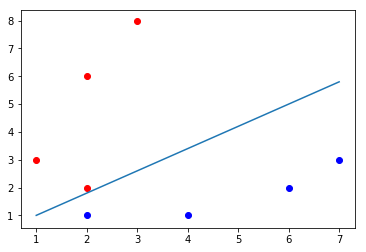

In [281]:
training_set = np.array([[1, 3, 1], [2, 2, 1], [3, 8, 1], [2, 6, 1], [2, 1, 1], [4, 1, 1], [6, 2, 1], [7, 3, 1]])
training_y = [1, 1, 1, 1, -1, -1, -1, -1]
perception_training_duailty(training_set, training_y)